In [1]:
import pandas as pd
# conda install -c conda-forge lightgbm
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv('train (3).csv')
test = pd.read_csv('test (1).csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pd.set_option('display.max_columns', 99)
train.head()

In [3]:
drops = ['isVideoAd_mean','Unnamed: 0','isTrueDirect','hits_min', 'hits_max',
         'hits_median','hits_sd', 'pageviews_min', 'pageviews_max','pageviews_median',
         'pageviews_sd']

train = train.drop(columns = drops)
test = test.drop(columns = drops)

In [4]:
cat = ['channelGrouping','browser','operatingSystem', 'deviceCategory', 'continent', 
       'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain', 'source','medium']

train[cat] = train[cat].astype('category')
test[cat] = test[cat].astype('category')

In [29]:
X_train_all = train.drop(['fullVisitorId','target','ret'], axis = 1)
y_train_all = train['ret']

X_train_ret = train[train['ret'] == 1].drop(['fullVisitorId','target','ret'], axis = 1)
y_train_ret = train[train['ret'] == 1]['target']

X_test = test.drop(['fullVisitorId','target','ret'], axis = 1)


In [30]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_train_ret, y_train_ret, test_size=0.33, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_train_all, y_train_all, test_size=0.33, random_state=42)


## Hyperparameters Tuning

In [31]:

estimator = lgb.LGBMRegressor()

param_grid = {'num_leaves': [40,50,70,90], 'bagging_fraction ' : [0.5,0.7,0.9], 'bagging_freq ': [9, 10, 11],
    'feature_fraction': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.01, 0.1]
}

lbm_re = RandomizedSearchCV(estimator, param_distributions = param_grid, cv=5, scoring = 'neg_mean_squared_error')
lbm_re.fit(X_train_re, y_train_re)
print(lbm_re.best_params_)

KeyboardInterrupt: 

In [ ]:
estimator = lgb.LGBMClassifier()

param_grid = {'num_leaves': [40,50,70,90], 'bagging_fraction ' : [0.5,0.7,0.9], 'bagging_freq ': [9, 10, 11],
    'feature_fraction': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.01, 0.1]
}

lbm_clf = RandomizedSearchCV(estimator, param_distributions = param_grid, cv=5, scoring = 'neg_log_loss')
lbm_clf.fit(X_train_clf, y_train_clf)
print(lbm_clf.best_params_)

## Train LightGBM Model

In [32]:
dtrain_clf = lgb.Dataset(X_train_clf, label = y_train_clf)
dtest_clf = lgb.Dataset(X_test_clf, label = y_test_clf)
dtrain_re = lgb.Dataset(X_train_re, label = y_train_re)
dtest_re = lgb.Dataset(X_test_re, label = y_test_re)

In [33]:
#Parameters of "isReturned" classificator 
param_lgb2 = {"objective":"binary",
              "num_leaves" : 40,
              "learning_rate" : 0.1, 
              "bagging_fraction" : 0.5,
              "feature_fraction" : 0.4,
              "bagging_frequency" : 11,
              "metric": "binary_logloss"}


#Parameters of "How_Much_Returned_Will_Pay" regressor
param_lgb3= {"objective" : "regression",
             "metric" : "rmse",
             "num_leaves" : 50,
             "learning_rate" : 0.01, 
             "bagging_fraction" : 0.7,
             "feature_fraction" : 0.6,
             "bagging_frequency" : 9}

In [36]:
clf_model = lgb.train(param_lgb2, dtrain_clf, 1200, valid_sets = [dtest_clf],
                      verbose_eval=20, early_stopping_rounds=700, categorical_feature = cat)

Training until validation scores don't improve for 700 rounds
[20]	valid_0's binary_logloss: 0.0300133
[40]	valid_0's binary_logloss: 0.0295287
[60]	valid_0's binary_logloss: 0.0294854
[80]	valid_0's binary_logloss: 0.0294963
[100]	valid_0's binary_logloss: 0.0295234
[120]	valid_0's binary_logloss: 0.0295832
[140]	valid_0's binary_logloss: 0.0296454
[160]	valid_0's binary_logloss: 0.0301234
[180]	valid_0's binary_logloss: 0.0301937
[200]	valid_0's binary_logloss: 0.030344
[220]	valid_0's binary_logloss: 0.0303798
[240]	valid_0's binary_logloss: 0.0304511
[260]	valid_0's binary_logloss: 0.0305525
[280]	valid_0's binary_logloss: 0.030591
[300]	valid_0's binary_logloss: 0.0306355
[320]	valid_0's binary_logloss: 0.0306748
[340]	valid_0's binary_logloss: 0.0307382
[360]	valid_0's binary_logloss: 0.0307749
[380]	valid_0's binary_logloss: 0.030818
[400]	valid_0's binary_logloss: 0.0308783
[420]	valid_0's binary_logloss: 0.0308991
[440]	valid_0's binary_logloss: 0.0309274


KeyboardInterrupt: 

In [ ]:
re_model = lgb.train(param_lgb3, dtrain_re, 1200, valid_sets = [dtest_re],
                      verbose_eval=20, early_stopping_rounds=700, categorical_feature = cat)

In [35]:
X_train_clf = lgb.Dataset(X_train_all, label = y_train_all)
X_train_re = lgb.Dataset(X_train_re, label = y_train_re)

In [37]:
pr_lgb_sum = 0
for i in range(10):
    lgb_model1 = lgb.train(param_lgb2, X_train_clf, 65)
    pr_lgb = lgb_model1.predict(X_test)
    lgb_model2 = lgb.train(param_lgb3, X_train_re,  168)
    pr_lgb_ret = lgb_model2.predict(X_test)
    pr_lgb_sum = pr_lgb_sum + pr_lgb * pr_lgb_ret

pr_final2 = (pr_lgb_sum / 10).round(20)

In [ ]:
df = pd.read_csv('test (1).csv', nrows=1) # Just take the first row to extract the columns' names
col_str_dic = {column:str for column in list(df)}
df = pd.read_csv('test (1).csv', dtype=col_str_dic)

data = {'fullVisitorId': [i for i in df.fullVisitorId], 'PredictedLogRevenue': [j for j in pr_final2]}
newsub = pd.DataFrame(data)

newsub.to_csv("submission_lgb.csv",index=False)


In [ ]:
newsub

## Feature importance

<function matplotlib.pyplot.show(*args, **kw)>

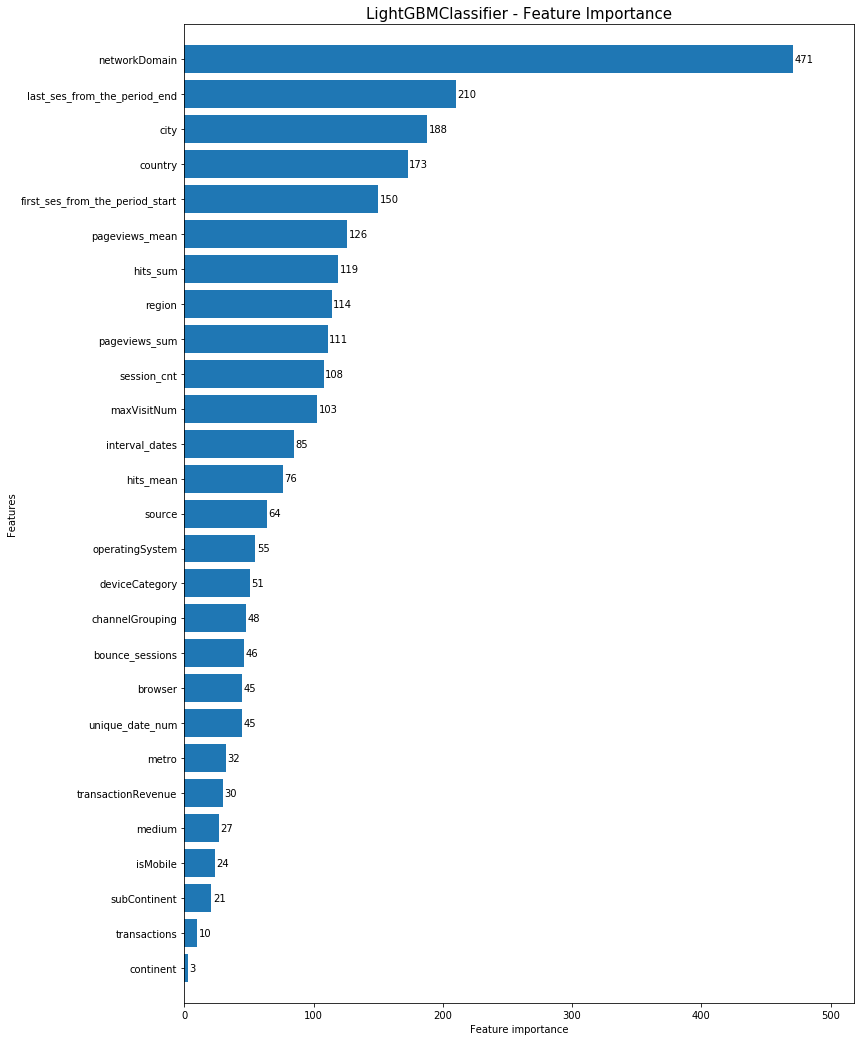

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(lgb_model1, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBMClassifier - Feature Importance", fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

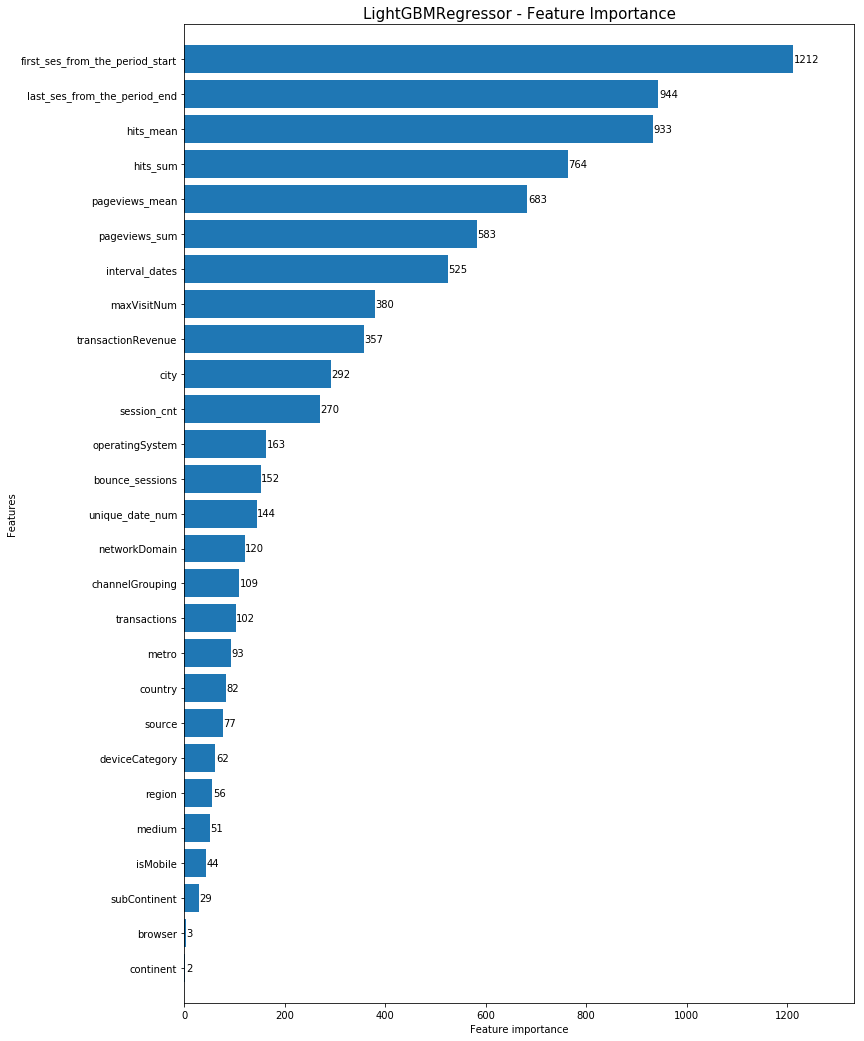

In [40]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(lgb_model2, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBMRegressor - Feature Importance", fontsize=15)
plt.show

## Feature Selection

In [12]:
# For CLassification
important_features_for_clf = ['networkDomain', 'last_ses_from_the_period_end','city','country','first_ses_from_the_period_start', 
'pageviews_mean','hits_sum', 'region','pageviews_sum','session_cnt','maxVisitNum']

X_train_all = X_train_all[important_features_for_clf]

X_test_clf_fs = X_test[important_features_for_clf]


In [13]:
# For Regression
important_features_for_re = ['first_ses_from_the_period_start',
                             'last_ses_from_the_period_end', 'hits_sum', 'pageviews_sum',
                             'hits_mean', 'pageviews_mean', 'interval_dates', 
                             'transactionRevenue', 'maxVisitNum', 'city']

X_train_ret = X_train_ret[important_features_for_re]
X_test_re_fs = X_test[important_features_for_re]

In [14]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_train_ret, y_train_ret, test_size=0.33, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_train_all, y_train_all, test_size=0.33, random_state=42)


In [15]:
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef,classification_report,roc_curve, auc, mean_squared_error, make_scorer, f1_score
from math import sqrt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV, RandomizedSearchCV
estimator = lgb.LGBMRegressor()

param_grid = {'num_leaves': [40,50,70,90], 'bagging_fraction ' : [0.5,0.7,0.9], 'bagging_freq ': [9, 10, 11],
    'feature_fraction': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.01, 0.1]
}

lbm_re = RandomizedSearchCV(estimator, param_distributions = param_grid, cv=5, scoring = 'neg_mean_squared_error')
lbm_re.fit(X_train_re, y_train_re)
print(lbm_re.best_params_)

{'num_leaves': 40, 'learning_rate': 0.01, 'feature_fraction': 0.6, 'bagging_freq ': 9, 'bagging_fraction ': 0.9}


In [16]:
estimator = lgb.LGBMClassifier()

param_grid = {'num_leaves': [40,50,70,90], 'bagging_fraction ' : [0.5,0.7,0.9], 'bagging_freq ': [9, 10, 11],
    'feature_fraction': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.01, 0.1]
}

lbm_clf = RandomizedSearchCV(estimator, param_distributions = param_grid, cv=5, scoring = 'neg_log_loss')
lbm_clf.fit(X_train_clf, y_train_clf)
print(lbm_clf.best_params_)

{'num_leaves': 40, 'learning_rate': 0.1, 'feature_fraction': 0.4, 'bagging_freq ': 10, 'bagging_fraction ': 0.9}


In [17]:
dtrain_clf = lgb.Dataset(X_train_clf, label = y_train_clf)
dtest_clf = lgb.Dataset(X_test_clf, label = y_test_clf)
dtrain_re = lgb.Dataset(X_train_re, label = y_train_re)
dtest_re = lgb.Dataset(X_test_re, label = y_test_re)

In [18]:
#Parameters of "isReturned" classificator 
param_lgb2 = {"objective":"binary",
              "num_leaves" : 40,
              "learning_rate" : 0.01, 
              "bagging_fraction" : 0.9,
              "feature_fraction" : 0.4,
              "bagging_frequency" : 10,
              "metric": "binary_logloss"}


#Parameters of "How_Much_Returned_Will_Pay" regressor
param_lgb3= {"objective" : "regression",
             "metric" : "rmse",
             "num_leaves" : 40,
             "learning_rate" : 0.01, 
             "bagging_fraction" : 0.9,
             "feature_fraction" : 0.6,
             "bagging_frequency" : 9}

In [19]:
cat_clf = ['country', 'region', 'city', 'networkDomain']
cat_re = ['city']

In [20]:
clf_model = lgb.train(param_lgb2, dtrain_clf, 1200, valid_sets = [dtest_clf],
                      verbose_eval=20, early_stopping_rounds=700, categorical_feature = cat_clf)

/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city', 'country', 'networkDomain', 'region']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 700 rounds
[20]	valid_0's binary_logloss: 0.0307216
[40]	valid_0's binary_logloss: 0.0310039
[60]	valid_0's binary_logloss: 0.0308969
[80]	valid_0's binary_logloss: 0.030863
[100]	valid_0's binary_logloss: 0.0308749
[120]	valid_0's binary_logloss: 0.0310135
[140]	valid_0's binary_logloss: 0.031066
[160]	valid_0's binary_logloss: 0.0308067
[180]	valid_0's binary_logloss: 0.0308714
[200]	valid_0's binary_logloss: 0.0309511
[220]	valid_0's binary_logloss: 0.0310635
[240]	valid_0's binary_logloss: 0.0311462
[260]	valid_0's binary_logloss: 0.031245
[280]	valid_0's binary_logloss: 0.031302
[300]	valid_0's binary_logloss: 0.0313704
[320]	valid_0's binary_logloss: 0.0314337
[340]	valid_0's binary_logloss: 0.0314795
[360]	valid_0's binary_logloss: 0.0316051
[380]	valid_0's binary_logloss: 0.0316744
[400]	valid_0's binary_logloss: 0.0317165
[420]	valid_0's binary_logloss: 0.0317842
[440]	valid_0's binary_logloss: 0.0318475
[460]	valid_0's binary

In [28]:
accuracy = accuracy_score(y_train_clf, y_test_clf)

ValueError: Found input variables with inconsistent numbers of samples: [949775, 467800]

In [21]:
re_model = lgb.train(param_lgb3, dtrain_re, 1200, valid_sets = [dtest_re],
                      verbose_eval=20, early_stopping_rounds=700, categorical_feature = cat_re)

/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 700 rounds
[20]	valid_0's rmse: 4.04981
[40]	valid_0's rmse: 4.00071
[60]	valid_0's rmse: 3.96611
[80]	valid_0's rmse: 3.94231
[100]	valid_0's rmse: 3.93009
[120]	valid_0's rmse: 3.92147
[140]	valid_0's rmse: 3.91509
[160]	valid_0's rmse: 3.91328
[180]	valid_0's rmse: 3.91308
[200]	valid_0's rmse: 3.91404
[220]	valid_0's rmse: 3.91632
[240]	valid_0's rmse: 3.92015
[260]	valid_0's rmse: 3.92487
[280]	valid_0's rmse: 3.92773
[300]	valid_0's rmse: 3.93017
[320]	valid_0's rmse: 3.93444
[340]	valid_0's rmse: 3.93721
[360]	valid_0's rmse: 3.94164
[380]	valid_0's rmse: 3.94625
[400]	valid_0's rmse: 3.95134
[420]	valid_0's rmse: 3.95596
[440]	valid_0's rmse: 3.95859
[460]	valid_0's rmse: 3.9618
[480]	valid_0's rmse: 3.96535
[500]	valid_0's rmse: 3.96945
[520]	valid_0's rmse: 3.97164
[540]	valid_0's rmse: 3.97523
[560]	valid_0's rmse: 3.97868
[580]	valid_0's rmse: 3.98178
[600]	valid_0's rmse: 3.9841
[620]	valid_0's rmse: 3.98718
[640]	valid_0'

In [22]:
X_train_clf = lgb.Dataset(X_train_all, label = y_train_all)
X_train_re = lgb.Dataset(X_train_ret, label = y_train_ret)

In [25]:
pr_lgb_sum = 0
for i in range(10):
    lgb_model1 = lgb.train(param_lgb2, X_train_clf, 345)
    pr_lgb = lgb_model1.predict(X_test_clf_fs)
    lgb_model2 = lgb.train(param_lgb3, X_train_re,  165)
    pr_lgb_ret = lgb_model2.predict(X_test_re_fs)
    pr_lgb_sum = pr_lgb_sum + pr_lgb * pr_lgb_ret

pr_final2 = pr_lgb_sum / 10

In [26]:
df = pd.read_csv('test (1).csv', nrows=1) # Just take the first row to extract the columns' names
col_str_dic = {column:str for column in list(df)}
df = pd.read_csv('test (1).csv', dtype=col_str_dic)

data = {'fullVisitorId': [i for i in df.fullVisitorId], 'PredictedLogRevenue': [j for j in pr_final2]}
newsub = pd.DataFrame(data)

newsub.to_csv("submission_lgb_fs.csv",index=False)
